In [1]:
import glob

import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
file = 'publication_database.csv'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils

def test_plot_database():
    ecdatabase = database.Database(file)
    ecdatabase.load_models()
    model_names = ecdatabase.get_model_names()
    plot_models_over_names(ecdatabase, model_names,'../publication_images')
    assert True


def get_fig_data(ec_model_row, image_directory):
    source_dir = os.sep.join([image_directory,str(ec_model_row['publication_id'].iloc[0]),'*.png'])
    print(source_dir)
    pngs = glob.glob(source_dir)
    extents=[]
    aspects=[]
    xticks=[]
    yticks =[]
    for png in pngs:
        with open(png[:-4]+'_extent.pkl','rb') as f:
            data = pickle.load(f)
        extents.append(data['extent'])
        aspects.append((np.max(data['xticks'])-np.min(data['xticks']))/((np.max(data['yticks'])-np.min(data['yticks']))))
        xticks.append(data['xticks'])
        yticks.append(data['yticks'])
    return pngs, extents, aspects, xticks, yticks

def prep_fig(png, extent,xticks,yticks,aspect):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    ax.imshow(plt.imread(png),extent=extent,aspect=aspect)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.grid(True)
    return fig, ax

def plot_models_over_names(ecdatabase,model_name_list,image_directory):
    for model in model_name_list:
        ec_model_row = ecdatabase.get_model_properties(model)
        temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100)
        fig, ax,destination = prep_fig(model, ec_model_row, image_directory)
        ax.plot(subdf['1/T multiplier']/temperature_range,ec_model_row['ec_model'].get_conductivity(T=temperature_range))
        fig.savefig(destination+'.png')

In [2]:
ecdatabase = database.Database(file)
ecdatabase.load_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/pyrrhenious/database.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


xu_1999_ill+gt
garnet
publication_images/xu1999/*.png


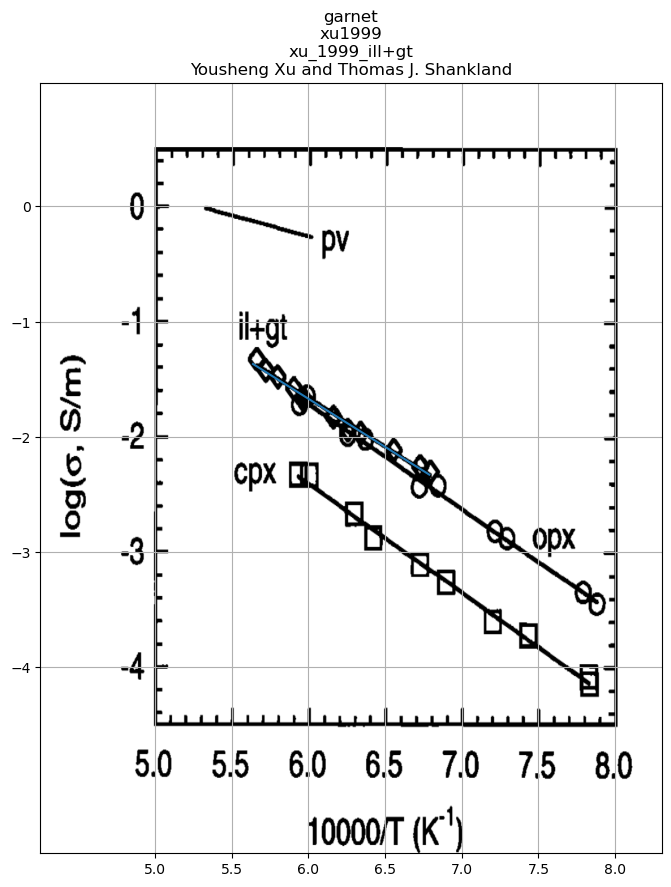

In [3]:
index = 0
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

DK_2009_gt
garnet
publication_images/DaiKarato2009a/*.png


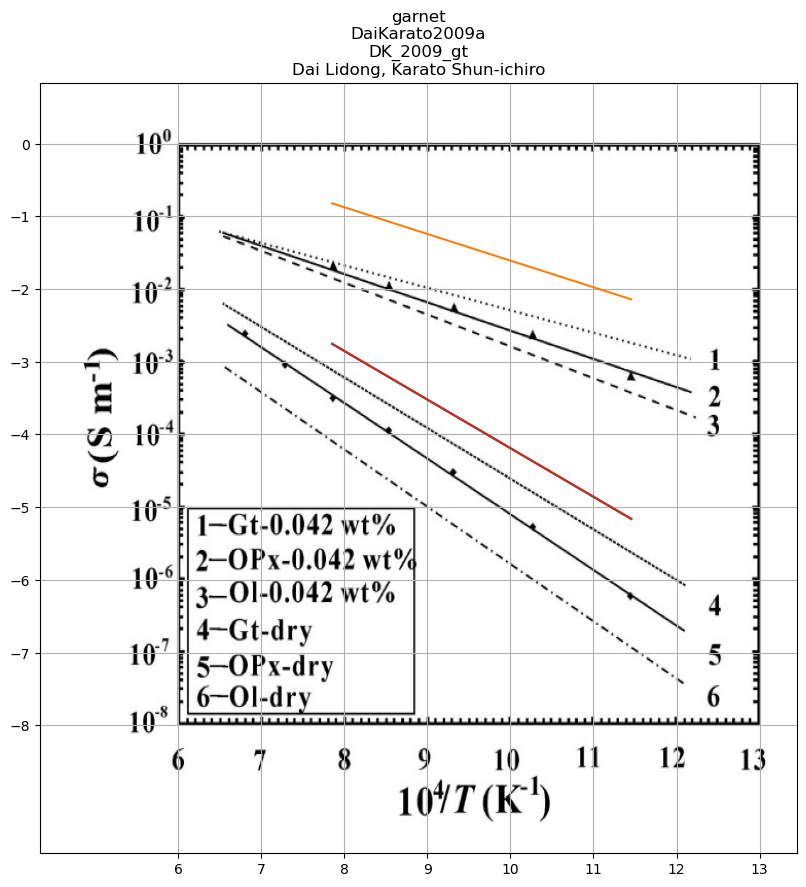

In [7]:
index = 1
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

Liu_19_garnet
garnet
publication_images/Liu2019/*.png


/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_20267/2675491241.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(1e4/temperature_range,np.log10(conductivity1))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_20267/2675491241.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(1e4/temperature_range,np.log10(conductivity3))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_20267/2675491241.py:18: RuntimeWarning: divide by zero encountered in log10
  ax.plot(1e4/temperature_range,np.log10(conductivity4))


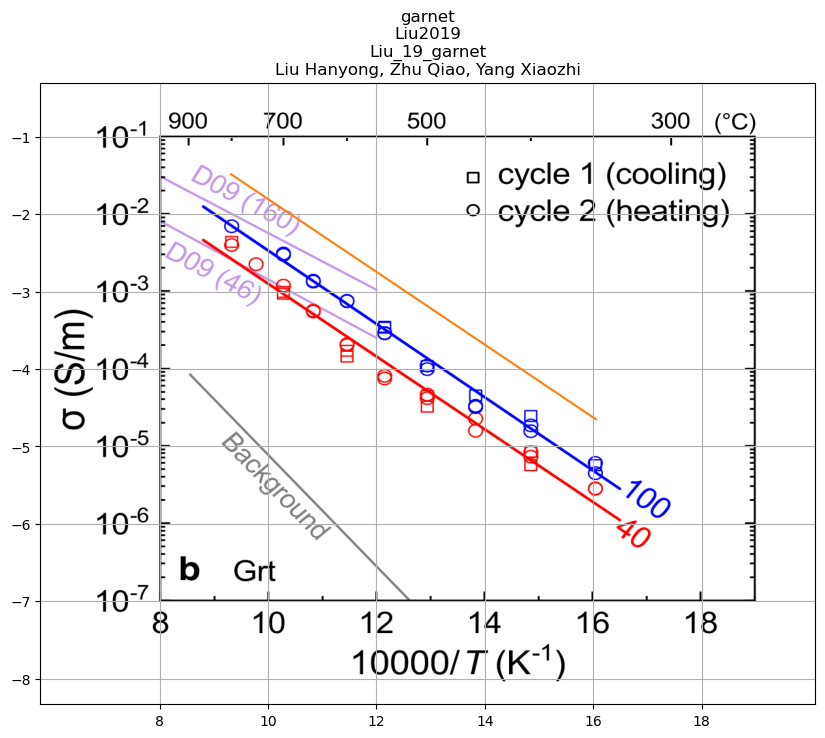

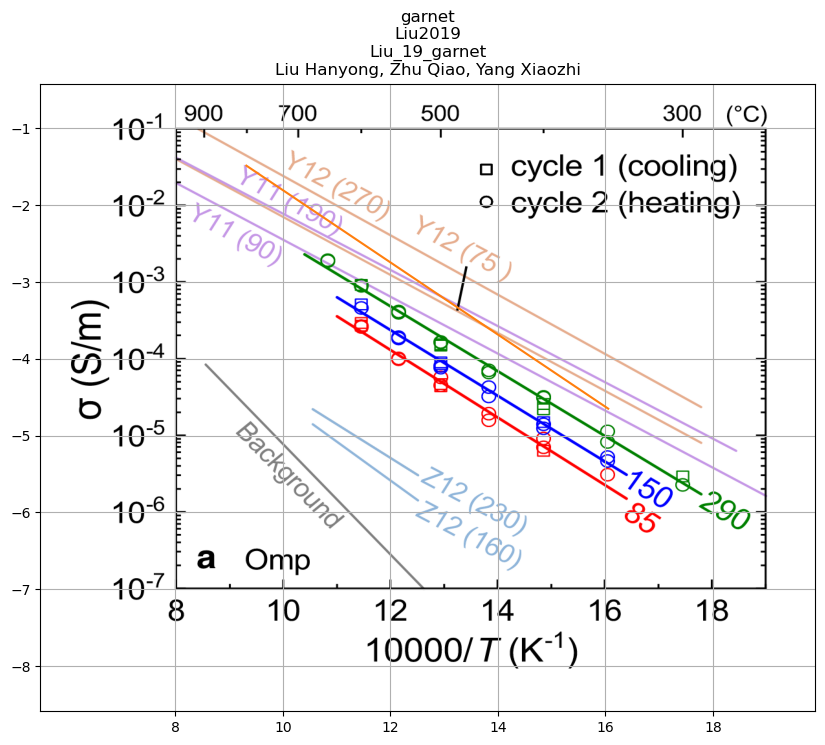

In [8]:
index = 2
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

Dai_09_garnet_dry
garnet
publication_images/DaiKarato2009b/*.png


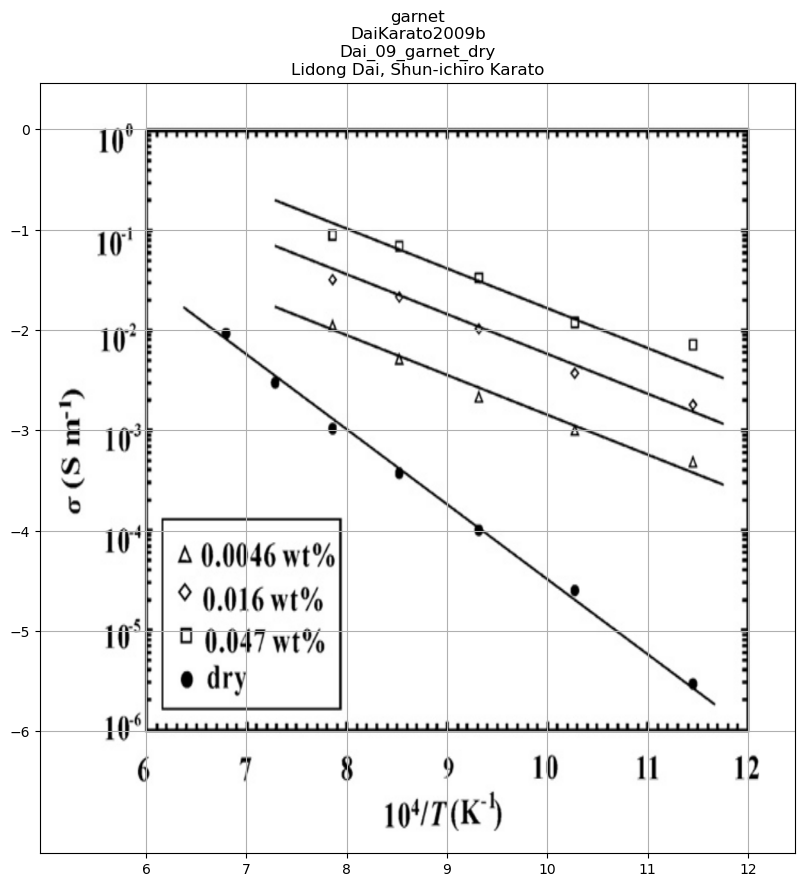

In [10]:
index = 4
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

Dai_12_garnet_dry
garnet
publication_images/DaiKarato2012/*.png


AssertionError: Did not provide an oxygen fugacity value!

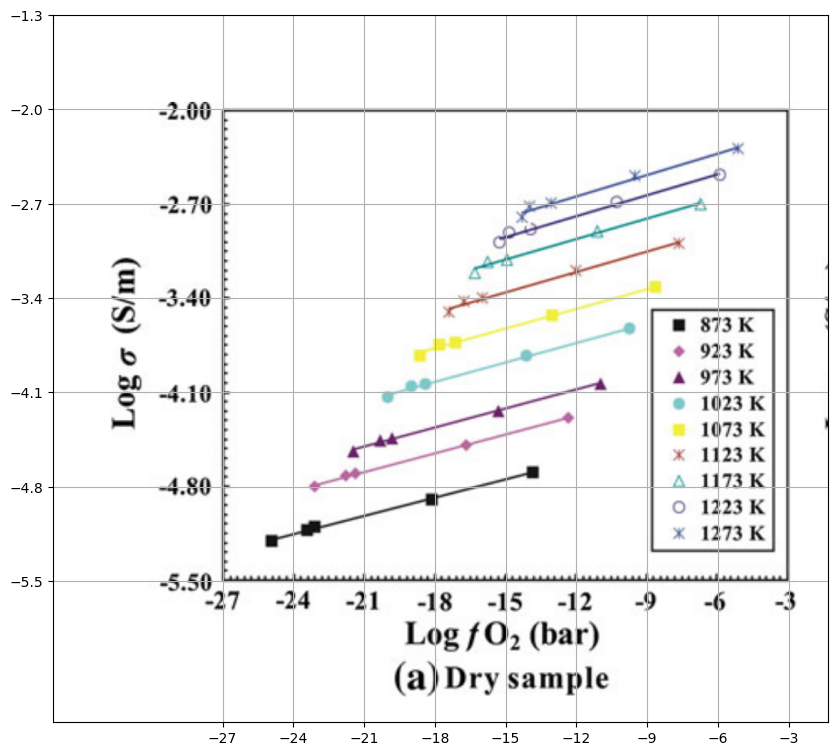

In [12]:
index = 5
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

Dai_12_garnet_wet
garnet
publication_images/DaiKarato2012/*.png


AssertionError: Did not provide an oxygen fugacity value!

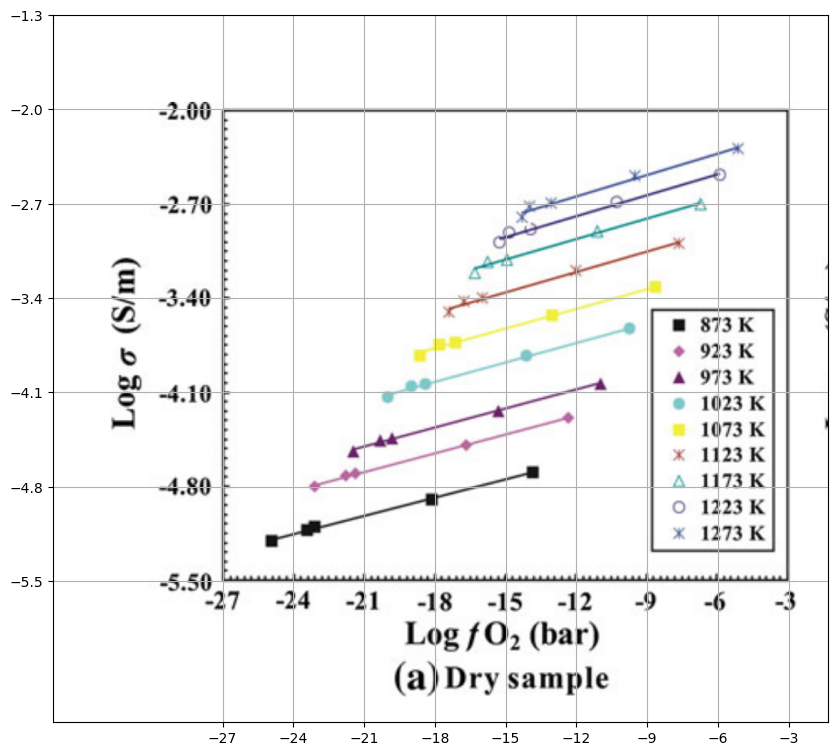

In [13]:
index = 6
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

dai_13_garnet_py_dry
garnet
publication_images/DaiKarato2013/*.png


AssertionError: Did not provide an oxygen fugacity value!

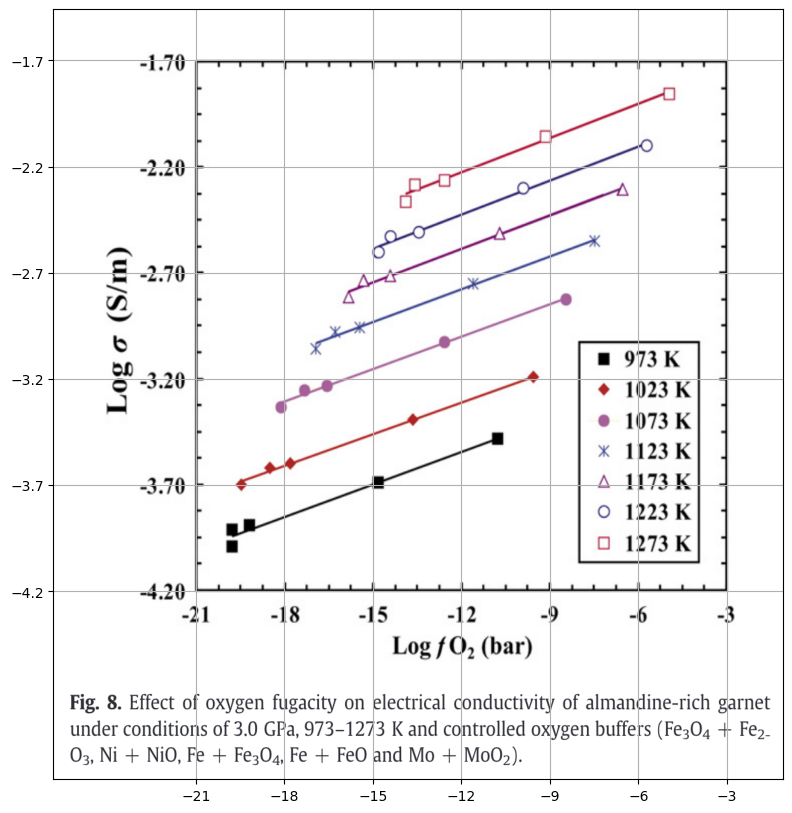

In [14]:
index = 7
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

dai_13_garnet_alm_dry
garnet
publication_images/DaiKarato2013/*.png


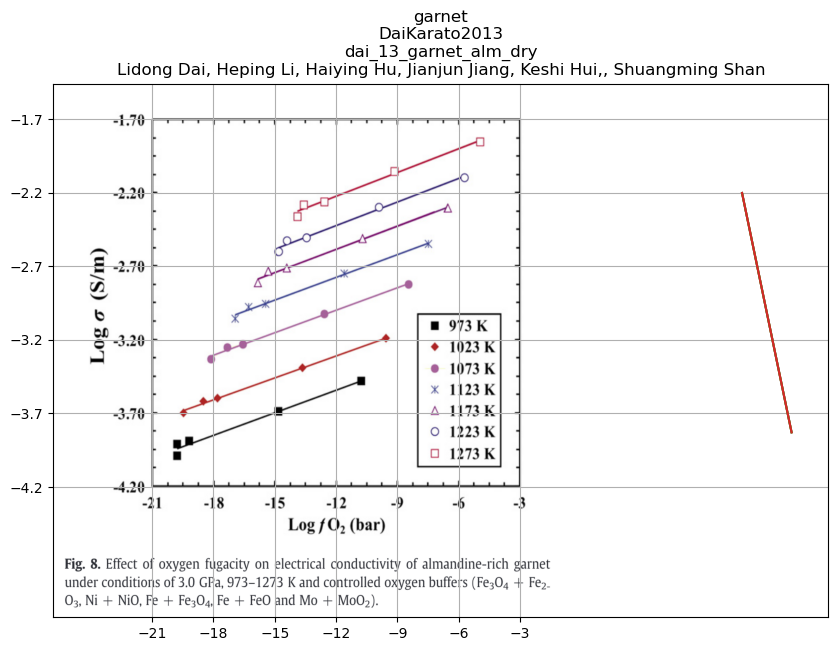

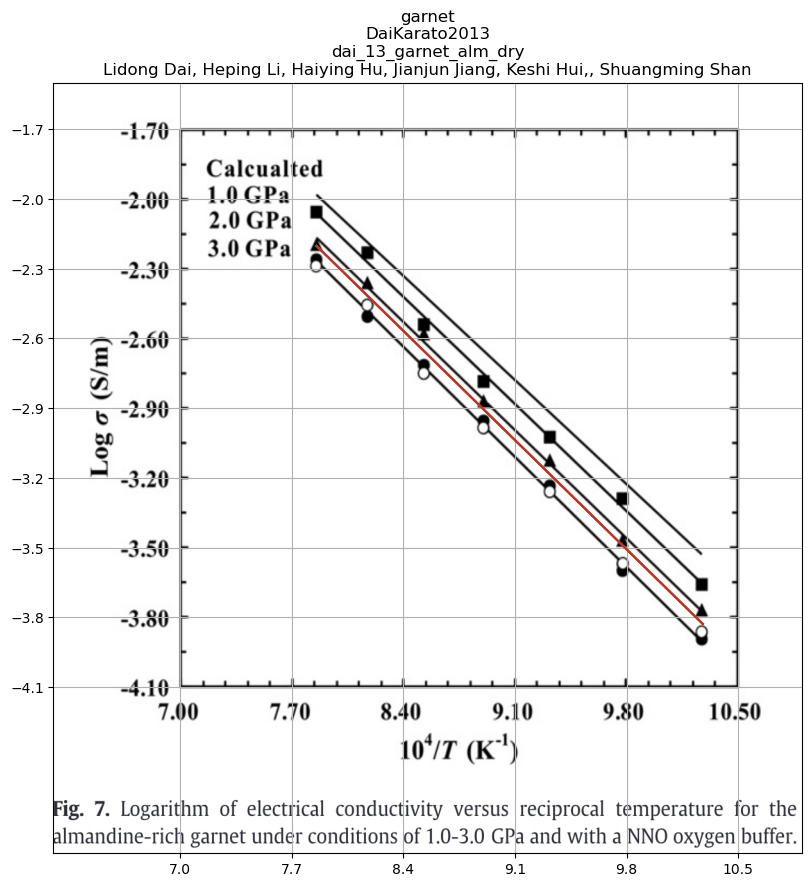

In [15]:
index = 8
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

YS_08_lowT_mj
garnet
publication_images/Yoshino2008/*.png


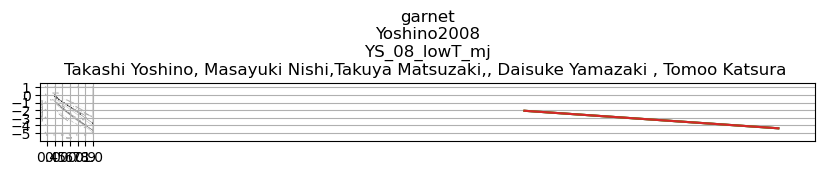

In [16]:
index = 9
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

YS_08_highT_mj
garnet
publication_images/Yoshino2008/*.png


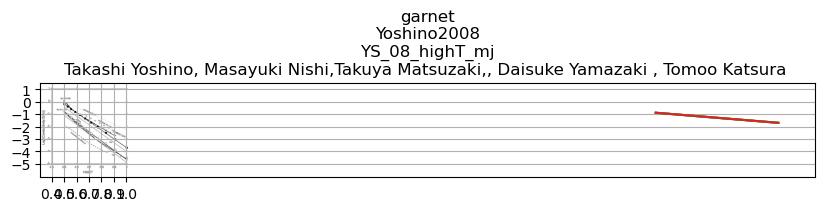

In [17]:
index = 10
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))

YS_08_morb_mj
garnet
publication_images/Yoshino2008/*.png


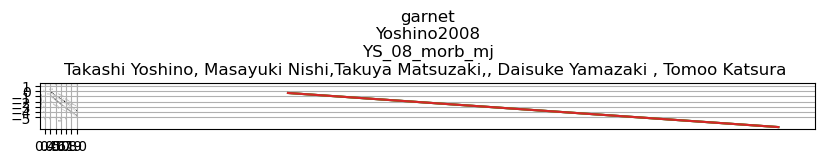

In [18]:
index = 11
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks =get_fig_data(ec_model_row, 'publication_images')
temperature_range = np.linspace(ec_model_row['temp_mink'],ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity2 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0.042,P=2)
    conductivity3 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    conductivity4 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,Cw=0,P=2)
    ax.set_title(ec_model_row['ec_model'].iloc[0].title)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    ax.plot(1e4/temperature_range,np.log10(conductivity4))